# Kings County House Sales Prediction


**Authors:** Maureen Kitanga, Samuel Kyalo, Priscila Kamiri, Leo Kariuki, Jimcollins Wamae & Steve Githinji
***

## Business Understanding
### Overview

Real estate developers are interested in identifying factors that influence the sale price of homes in King County, as well as developing models to predict the sale price of homes based on these factors. This information can be used to optimize the design and marketing of new properties, identify investment opportunities, and make data-driven decisions about the development and sale of properties.
***

### Business Problem

The stakeholder is Real Estate Developer in a northwestern county who identifies and acquires land for new development projects, as well as oversees the construction process from start to finish. The Real Estate developer want to gain market insights that will lead to an increase in house sales.


***

### Problem Questions

* How does the size and quality of the property influence the sale price of homes in King County?
* How does the house neighborhood/location affect the prices?
* How accurately can we predict the sale price of homes in King County based on the available features?


## Data Undestanding

The King County House Sales dataset contains information on over 21,000 home sales in King County, Washington, USA between May 2014 and May 2015. The dataset includes a variety of features such as the number of bedrooms and bathrooms, the size of the property, the location of the property, and various other attributes that may influence the sale price of a home.

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings("ignore") 

In [2]:
# Your code here - remember to use markdown cells for comments as well!
data = pd.read_csv('data/kc_house_data.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

## Data Preparation

In [5]:
# Function to check the numeric and catergorical columns in the dataframe
def check_columns(data):
    #Create empty lists to store the names of numeric and categorical columns
    num_cols = []
    cat_cols = []
    
    # Looop through each column in the dataframe
    for col in data.columns:
        # if column contains numerical data, add to list of numeric columns
        if pd.api.types.is_numeric_dtype(data[col]):
            num_cols.append(col)
        # if column contains categoracal data, add to list of categorical columns
        if pd.api.types.is_object_dtype(data[col]):
            cat_cols.append(col)
    # Print out names of numeric and categorical data
    print()

In [6]:
#checking for missing values
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Missing Values


The `waterfront` column is a categorical column. The column has 2 unique values, 'YES' and 'NO' with 2376 missing values. As this is a fairly number of the total records, we shall be replacing the missing values with the mode of the column. The mode of the column is 'NO'. Therefore, we shall be replacing the missing values with 'NO'.


In [7]:
# Fill the missing values with the mode of the column(waterfront)
data['waterfront'] = data['waterfront'].fillna(data['waterfront'].mode()[0])

The `view` column is a categorical column. With 63 missing values, . As this is a small number of the total records, we shall be replacing  the records with mode,in this case 'NO'.

In [8]:
# Fill the missing values with the mode of the column(view)
data['view'] = data['view'].fillna(data['view'].mode()[0])

The `yr renovated` column is a numerical column with 3842 missing values. Futhermore, majority of the data in the records were zero. This could either be suggesting that the homes have never been renovated or that the data is erroneous. As there is no ideal way of daling with these values, it would be best to drop the entire column.

In [9]:
# Drop the 'yr_renovated' column
data.drop('yr_renovated', axis=1, inplace=True)

# Preview the first five rows of the dataframe
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503


### Outliers

In [ ]:
git add .
git commit -m "First commit"
git branch -M main
git remote add origin git@github.com:waihiga9/Phase_2_Project.git
git push -u origin main

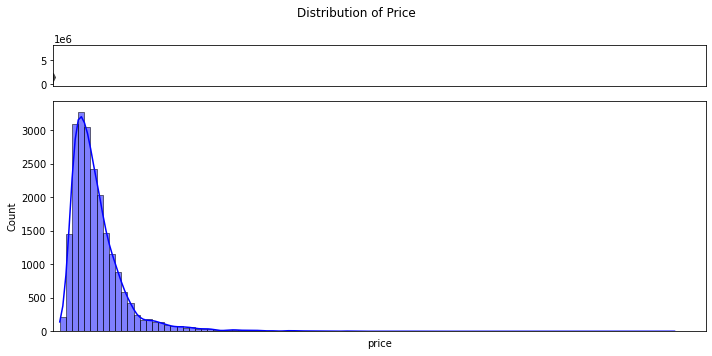

In [10]:
# Function to plot the histogram, kde and boxplot of the data
def plot_distribution(df, col, title, bins_=10):
    
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    
    # assign a graph to each ax
    sns.boxplot(df[col], ax=ax_box, color='blue')
    sns.histplot(data=df, x=col, ax=ax_hist, kde=True, color='blue', bins=bins_, edgecolor='black')
    plt.suptitle(title)
    plt.tight_layout();
plot_distribution(data,'price','Distribution of Price',100)

From the distribution above, price seems to be skewed to the right, which means that the mean prices of the homes are. 

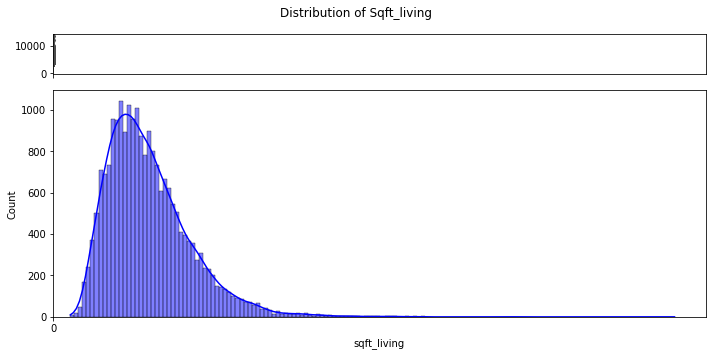

In [11]:
plot_distribution(data,'sqft_living','Distribution of Sqft_living',150)

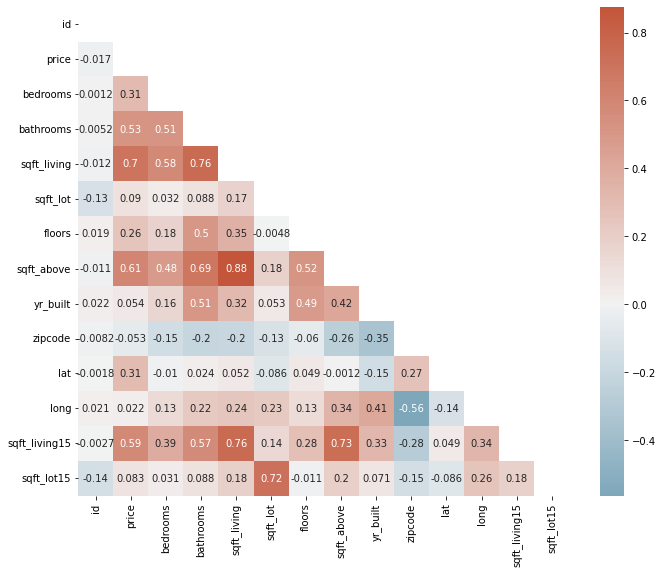

In [12]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(11,9))
sns.heatmap(corr, cmap=sns.diverging_palette(230, 20, as_cmap=True), mask = mask, annot=True, center=0);

In [13]:
# Seperate groups of features into seperate dataframes: counts, size, quality
data_size = data[['price','sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']]
data_quality = data[['price','condition', 'grade', 'yr_built', 'lat', 'long', 'zipcode']]
data_counts = data[['price','floors', 'bedrooms', 'bathrooms', 'waterfront', 'view']]

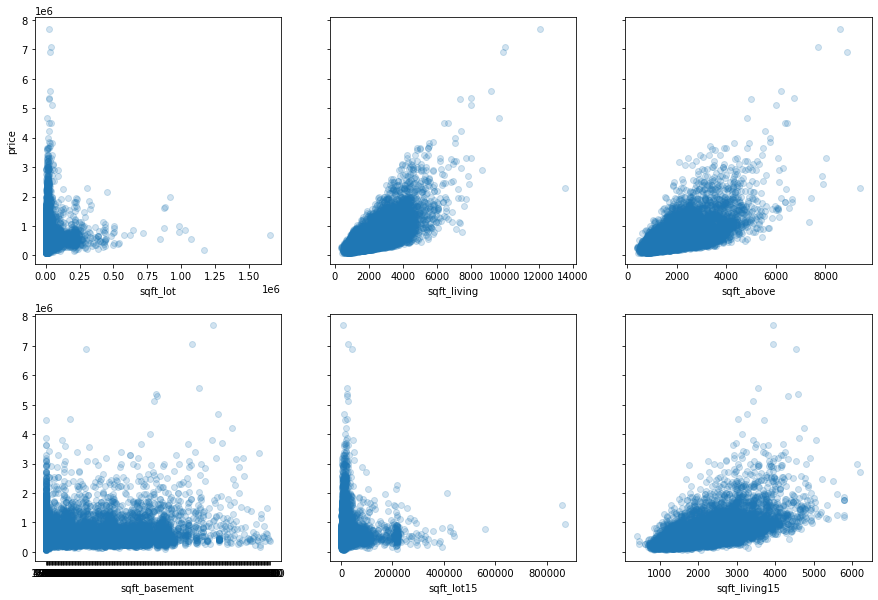

In [14]:
def plot_features(df, features):
    num_features = len(features)
    num_cols = min(num_features, 3)
    num_rows = (num_features + num_cols - 1) // num_cols
    
    fig, ax = plt.subplots(figsize=(5*num_cols, 5*num_rows), nrows=num_rows, ncols=num_cols, sharey=True)
    ax[0, 0].set_ylabel('price')
    
    i = 0
    for feature in features:
        ax[i//num_cols, i%num_cols].scatter(x=feature, y='price', data=df, alpha=0.2)
        ax[i//num_cols, i%num_cols].set_xlabel(feature)
        i += 1
    
    plt.show()

plot_features(data_size, ['sqft_lot', 'sqft_living', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15'])


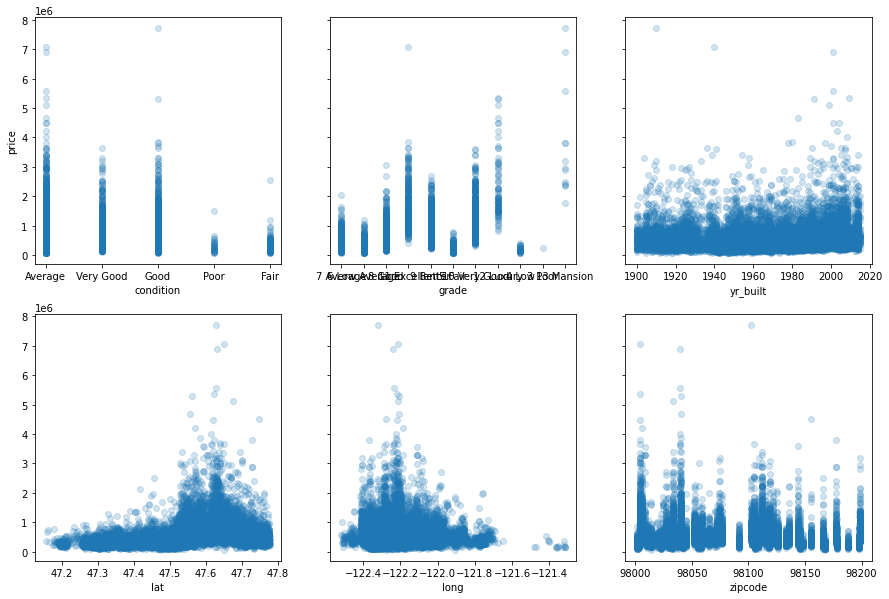

In [15]:
plot_features(data_quality,['condition', 'grade', 'yr_built', 'lat', 'long', 'zipcode'])

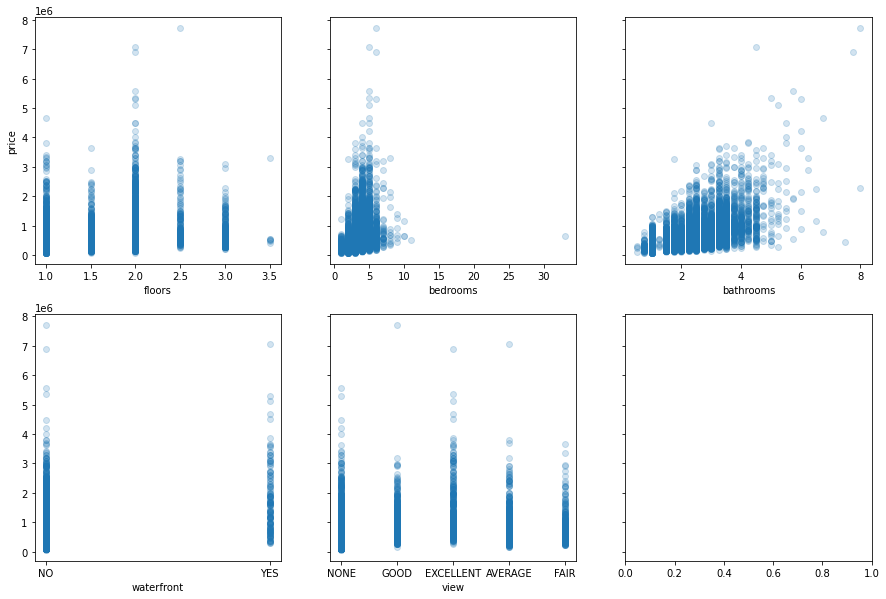

In [16]:
plot_features(data_counts, ['floors', 'bedrooms', 'bathrooms', 'waterfront', 'view'])

### One-Hot Encoding

In order to use a categorical variable in our model, we'll create multiple dummy variables, one for each category of the categorical variable.

In [17]:
# Check unique values in 'grade' column and their count
data['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [18]:
# Create dummy variables and avoid dummy variable trap by dropping one of the dummy variables
pd.get_dummies(data, columns=["grade"], drop_first=True)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0,0,0,0,0,0,0,1,0,0
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,...,0,0,0,0,0,0,0,0,1,0


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  object 
 9   view           21597 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

## Modelling

### Simple Linear Regression


We will use simple linear regression as our baseline model. The regression will be between two variables , the sale price as the dependent variable and the Square footage of living space in the home as the independent variable in our model.

In [20]:
#importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

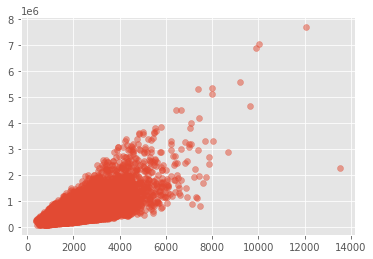

In [21]:
# Assigning values of the variables
X = data.sqft_living
Y = data.price

plt.scatter(X,Y, alpha=0.5);

From the scatter plot we identified that the relationship is linear

### Calculating the Slope

### Calculating the Intercept
Now that we have our estimated slope m , we can calculate the estimated intercept c.

In [22]:
X = data[['sqft_living']]
y = data['price']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:37:14   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

eval_env: 1


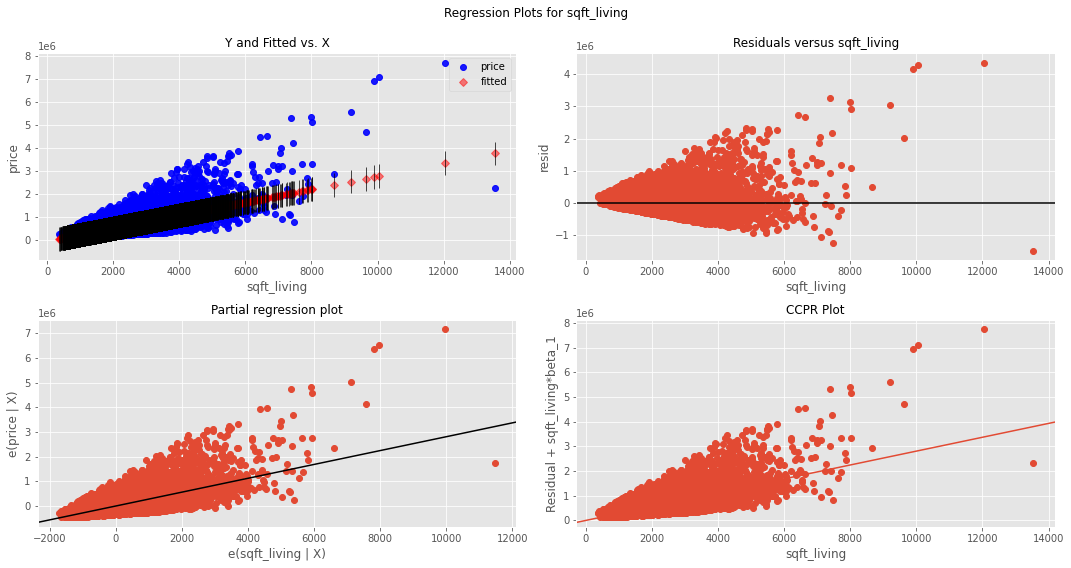

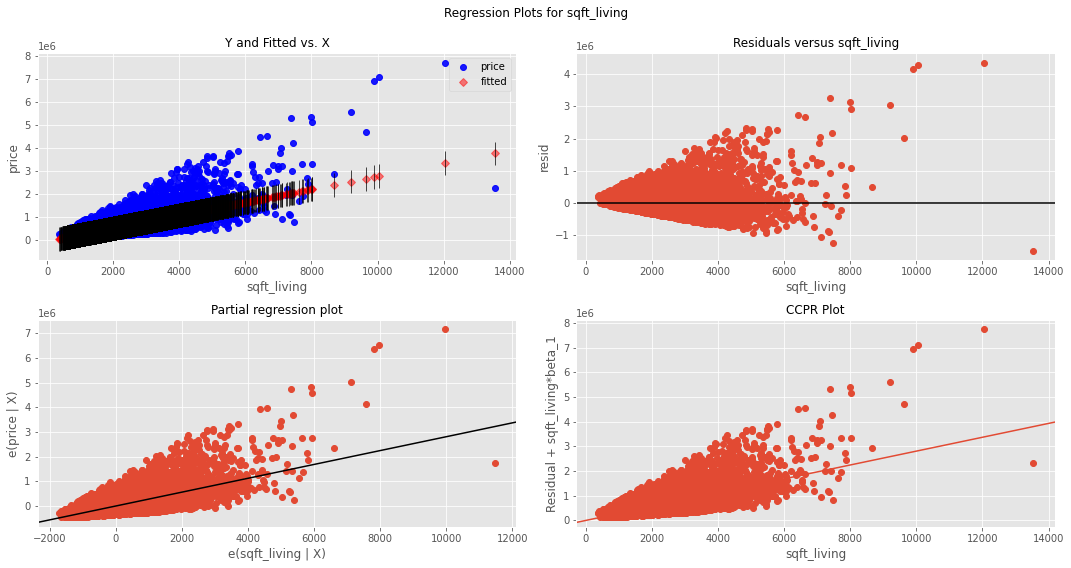

In [23]:
# Plot partial regression plot for the feature
fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(
    results,
    'sqft_living',
    fig=fig)

### Interpretation
 The overall formula is y=280.86x - 43988.89.

The intercept (where the line crosses the y-axis) is at -43998.89 . This means that if the Square footage of living space in the home is equal to 0, the  Sale price would be -43998.89

The slope of the line is 280.86 . This means that every increase of 1 in the value of Square footage of living space in the home is associated with an increase of 280.86 in the Sale price .

In [24]:
X = data[['sqft_above']]
y = data['price']

model = sm.OLS(y, sm.add_constant(X))
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.366
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                 1.249e+04
Date:                Tue, 18 Apr 2023   Prob (F-statistic):               0.00
Time:                        18:37:26   Log-Likelihood:            -3.0246e+05
No. Observations:               21597   AIC:                         6.049e+05
Df Residuals:                   21595   BIC:                         6.049e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.976e+04   4737.581     12.613      0.0

In [21]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,0.0,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NO,NONE,Average,8 Good,1600,0.0,2004,98027,47.5345,-122.069,1410,1287


### Multiple Linear Regression Plot

In [54]:
X_all = data[['sqft_living', 'sqft_living15', 'sqft_above', 'bedrooms', 'bathrooms', 
              'grade_7 Average', 'grade_8 Good', 'grade_9 Better', 'grade_6 Low Average', 
              'grade_10 Very Good', 'grade_11 Excellent', 'grade_5 Fair',         
               'grade_12 Luxury', 'grade_4 Low', 'grade_13 Mansion', 'grade_3 Poor']]

multiple_model = sm.OLS(y, sm.add_constant(X_all))
multiple_results = multiple_model.fit()
print(multiple_results.summary())

KeyError: "['grade_6 Low Average', 'grade_3 Poor', 'grade_12 Luxury', 'grade_8 Good', 'grade_7 Average', 'grade_13 Mansion', 'grade_9 Better', 'grade_11 Excellent', 'grade_10 Very Good', 'grade_5 Fair', 'grade_4 Low'] not in index"

## Regression Results

##  Conclusion